## Heart disease using 8 machine learning algorithms :
1. Linear Regression    60.79
2. Logistic Regression   92.307 
3. Rondom Forest Regression 66.114
4. KNN classifier  79.125
5. decision tree   83.516
6. XGBoost   24.144
7. naive-bayes   90.109
8. support vactor machine   92.307

In [125]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib

In [126]:
#importing data set
data=pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# data info

### List of  variables:

 List of variables:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. target: (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
    simply {0=not having heart disease,1=having heart disease}
    

In [127]:
#Dataset columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [128]:
#each numerical value statistics in the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [129]:
#columns names
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# finding missing value 

In [130]:
#to check the number of null values present
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# data correlation 

In [131]:
#to check the correlation between the target and input variables
data[data.columns[1:]].corr()['target'][:]

sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

The correlation between fbs,chol and target is less so we can remove them

In [132]:
data=data.drop(['fbs','chol'],axis=1)

# vizualisation 

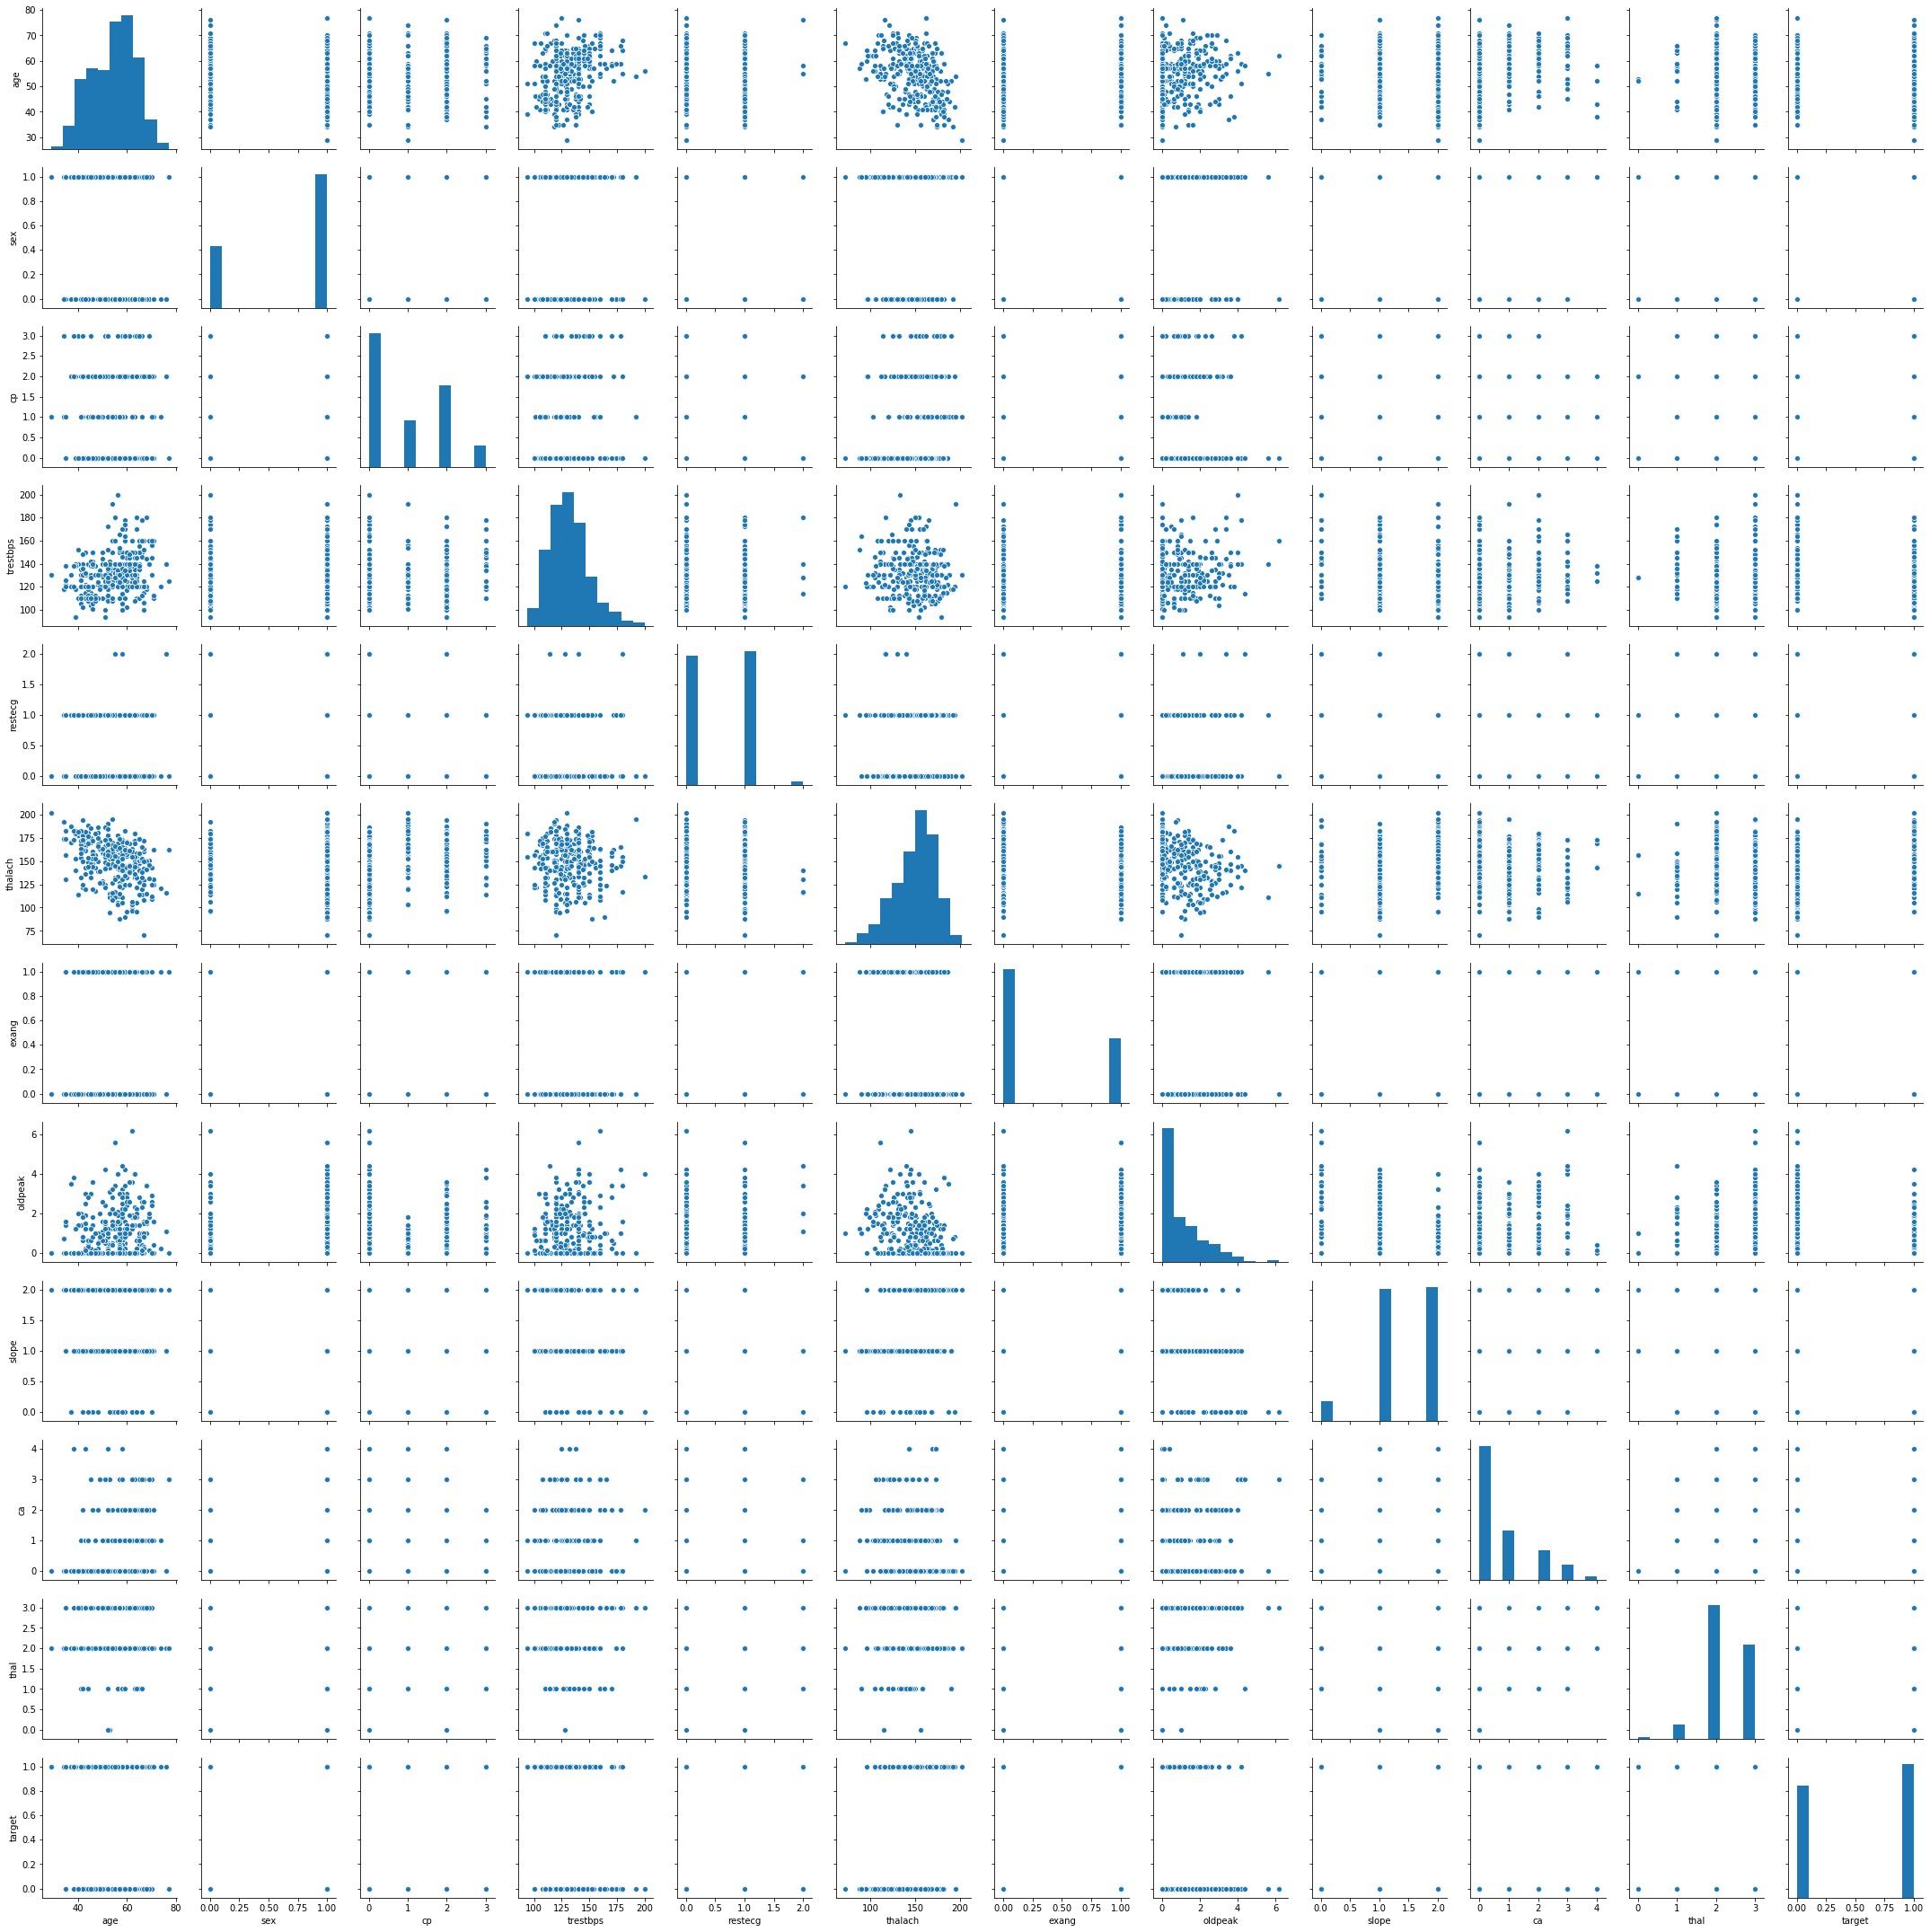

In [9]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251BED71B08>,
      dtype=object)

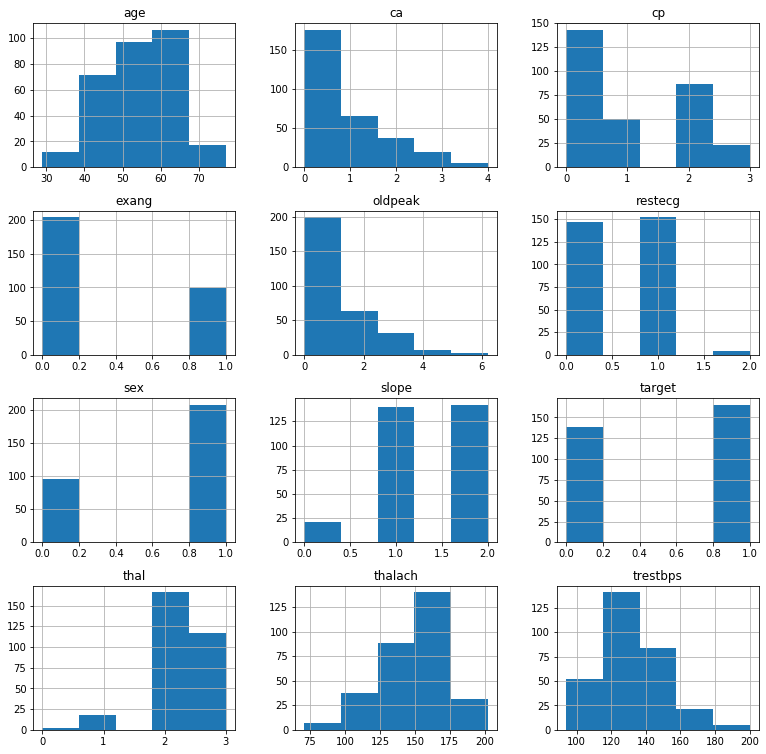

In [79]:
#distribution of each continous variables
a1=data.hist(bins=5,figsize=(13,13))
a1

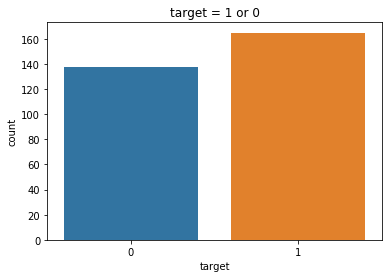

In [80]:
#countplot for the target variable
sns.countplot(x='target',data=data)
plt.title('target = 1 or 0');

Text(0.5, 0, 'sex')

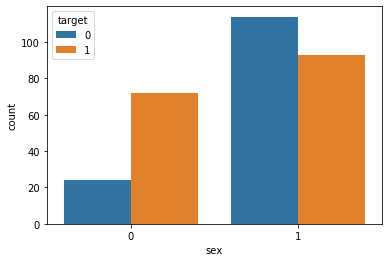

In [81]:
#count plot between target and sex variables
sns.countplot(x='sex',hue='target',data=data)
plt.xlabel('sex')

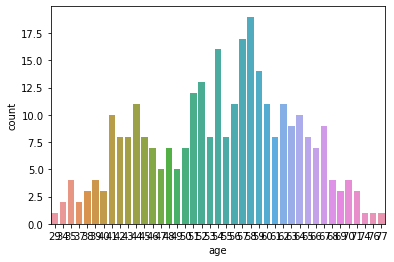

In [82]:
#distribution of age variable
sns.countplot(x='age',data=data);

# import library and spliting data 

In [133]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [134]:
x=data.drop(['target'],axis=1)
y=data.target

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=5)

In [136]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(212, 11) (212,) (91, 11) (91,)


# 1)	Linear Regression

In [137]:
from sklearn import linear_model

In [138]:
#Train the model
lir= linear_model.LinearRegression()

In [139]:
#Fit the model
lir.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
#predicting the test values
pred=lir.predict(x_test)
pred

array([ 0.81238694, -0.10469253, -0.08327609,  0.31329592,  0.6566004 ,
        0.01020748,  0.57219093, -0.16980988,  0.94362411,  0.55871997,
        0.68798836, -0.11808868,  0.77974553,  1.01311327,  0.32269775,
        0.32383675,  0.39610176,  0.62785097,  0.83762223,  0.33650409,
       -0.24420086,  0.16959593,  1.13781521,  0.06357785,  0.26757006,
        0.72911347,  0.68590678,  1.00262362,  1.1605505 ,  0.01206883,
        0.9956584 ,  0.84162766,  0.57440312,  0.63816836,  0.15476546,
       -0.01713397,  0.79994201,  0.78580415,  0.30408561,  0.6729069 ,
        0.63475794,  0.10659895,  0.62848447, -0.13150436,  0.17169637,
        0.11513003, -0.17474584,  0.07360532,  0.07584793, -0.22651098,
       -0.07651254,  0.7265815 ,  0.87045172,  0.66550454,  1.16060128,
        0.59905006,  0.7333023 ,  0.54226762,  0.59622939,  0.87551755,
        0.41414421,  0.36880428,  0.21309075,  0.56948066,  0.55731372,
        1.0191386 , -0.15708919,  0.88699265,  0.8683347 ,  0.03

In [141]:
#Score/Accuracy
print("Accuracy --> ", lir.score(x_test, y_test)*100)

Accuracy -->  60.79716164388178


# 2) logistic regression

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
lor= LogisticRegression()

In [144]:
#Fit the model
lor.fit(x_train, y_train)

C:\Users\DEEPTHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
pred= lor.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [146]:
#Score/Accuracy
print("Accuracy --> ", lor.score(x_test, y_test)*100)

Accuracy -->  92.3076923076923


# 3 ) Random Forest Regression

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
#Train the model
rmf = RandomForestRegressor(n_estimators=50)

In [149]:
#Fit
rmf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [150]:
pred=rmf.predict(x_test)
pred

array([0.64, 0.08, 0.1 , 0.16, 0.64, 0.06, 0.48, 0.06, 0.98, 0.98, 0.94,
       0.12, 0.84, 0.94, 0.72, 0.22, 0.26, 0.34, 0.9 , 0.12, 0.  , 0.1 ,
       0.96, 0.1 , 0.3 , 1.  , 0.74, 0.94, 0.88, 0.  , 0.74, 0.98, 0.6 ,
       0.74, 0.18, 0.18, 0.98, 0.98, 0.2 , 0.7 , 0.54, 0.14, 0.44, 0.16,
       0.22, 0.08, 0.  , 0.18, 0.04, 0.04, 0.04, 0.74, 0.9 , 0.8 , 1.  ,
       0.6 , 0.7 , 0.54, 0.62, 0.92, 0.14, 0.26, 0.02, 0.72, 0.78, 0.96,
       0.1 , 1.  , 1.  , 0.  , 0.5 , 0.66, 0.96, 0.26, 0.08, 1.  , 0.14,
       0.96, 0.56, 0.92, 1.  , 0.48, 1.  , 0.26, 0.46, 0.92, 0.36, 0.2 ,
       1.  , 0.14, 0.3 ])

In [151]:
#Score/Accuracy
print("Accuracy --> ", rmf.score(x_test, y_test)*100)

Accuracy -->  65.93848837209302


# 4) KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn = KNeighborsClassifier(n_neighbors=25)

In [154]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [155]:
pred = knn.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [156]:
#Score/Accuracy
print("Accuracy --> ", knn.score(x_test, y_test)*100)

Accuracy -->  79.12087912087912


# 5) decision tree 

In [157]:
from sklearn import tree

In [158]:
dt = tree.DecisionTreeClassifier()

In [159]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [160]:
pred = dt.predict(x_test)
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [161]:
#Score/Accuracy
print("Accuracy --> ", dt.score(x_test, y_test)*100)

Accuracy -->  84.61538461538461


# 6) XGBoost

In [162]:
import xgboost as xgb

In [163]:
xgbreg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [164]:
xgbreg.fit(x_train,y_train)

[18:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [165]:
pred = xgbreg.predict(x_test)
pred

array([0.56983626, 0.3771165 , 0.4421637 , 0.45934674, 0.53505373,
       0.41598746, 0.55863976, 0.4060662 , 0.6369822 , 0.60284096,
       0.60123247, 0.42938706, 0.57144773, 0.6366957 , 0.57798576,
       0.5001727 , 0.5147426 , 0.5752617 , 0.54620755, 0.3826446 ,
       0.3647001 , 0.41598746, 0.57024777, 0.42742693, 0.5582681 ,
       0.6369822 , 0.5792021 , 0.6262332 , 0.5444193 , 0.44444966,
       0.5250547 , 0.64661694, 0.5297681 , 0.53722405, 0.42840385,
       0.49567688, 0.6369822 , 0.59444875, 0.44908032, 0.57952106,
       0.52071273, 0.48123533, 0.56239927, 0.3647001 , 0.4956509 ,
       0.40847313, 0.3647001 , 0.42742693, 0.441816  , 0.40558732,
       0.46199292, 0.58489645, 0.557582  , 0.61364883, 0.64661694,
       0.546412  , 0.5385034 , 0.49880922, 0.5936273 , 0.64661694,
       0.50399363, 0.51559293, 0.44444966, 0.561813  , 0.57574755,
       0.62078846, 0.3771165 , 0.62706095, 0.64661694, 0.3647001 ,
       0.45170334, 0.5274193 , 0.6369822 , 0.43091482, 0.37711

In [166]:
#Score/Accuracy
print("Accuracy --> ", xgbreg.score(x_test, y_test)*100)

Accuracy -->  24.14406062640133


# 7) naive-bayes

In [167]:
from sklearn.naive_bayes import GaussianNB

In [168]:
gnb= GaussianNB()

In [169]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [170]:
pred=gnb.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [171]:
#Score/Accuracy
print("Accuracy --> ",gnb.score(x_test, y_test)*100)

Accuracy -->  90.10989010989012


# 8) support vactor machine 

In [172]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svms= svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svms.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [173]:
#Predict the response for test dataset
pred = svms.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [174]:
#Score/Accuracy
print("Accuracy --> ", svms.score(x_test, y_test)*100)

Accuracy -->  92.3076923076923
